In [45]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Shashwat
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# making a spam detection filter using python

In [46]:
messages=[line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]  # list comprehension

In [47]:
print(len(messages))

5574


In [48]:
messages[0]   # string of 1st message,, \t is tab separation

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [49]:
for mess_no,message in enumerate(messages[:10]):    # first ten messages
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [50]:
import pandas as pd

In [51]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])  # sep is separater here tab, and names of the columns is label and message

In [52]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [53]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [54]:
messages['length']=messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

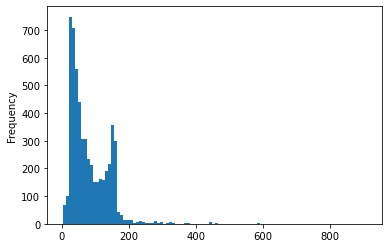

In [56]:
messages['length'].plot.hist(bins=100)

In [57]:
messages['length'].describe()  # grabbing the 900 length message using pandas masking

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [58]:
messages[messages['length']==910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [59]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

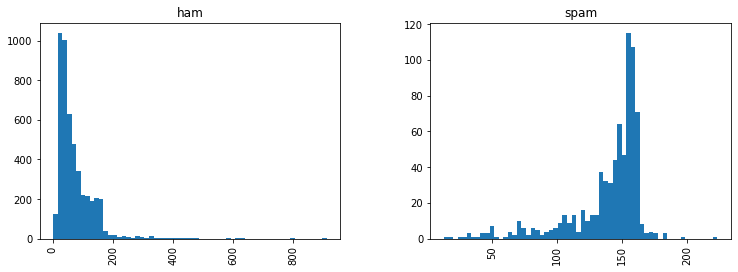

In [60]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))  # spam messages tend to have more characters

In [61]:
import string

In [62]:
mess = 'Sample message! Notice: it has punctuation.'

In [63]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [64]:
nopunc = [c for c in mess if c not in string.punctuation]
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [65]:
from nltk.corpus import stopwords

In [66]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [67]:
nopunc = ''.join(nopunc)  # joins by blank space
nopunc  # will print nopunc without the punctuation

'Sample message Notice it has punctuation'

In [68]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [69]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]  # if the lower case version of the word is not in stop words take that

In [70]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [71]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop
    3. return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [72]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [73]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [76]:
print(len(bow_transformer.vocabulary_))

11425


In [77]:
mess4 = messages['message'][3]

In [78]:
print(mess4)

U dun say so early hor... U c already then say...


In [79]:
bow4 = bow_transformer.transform([mess4])

In [80]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [81]:
print(bow4.shape)

(1, 11425)


In [82]:
bow_transformer.get_feature_names()[9554]

'say'

In [83]:
messages_bow = bow_transformer.transform(messages['message'])

In [84]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [85]:
messages_bow.nnz # no of non zero occurences

50548

In [86]:
# there is a formula in the notebook to calculate the sparsity of the matrix

In [87]:
from sklearn.feature_extraction.text import TfidfTransformer

In [88]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [90]:
tfidf4 = tfidf_transformer.transform(bow4)

In [91]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [93]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [94]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [95]:
from sklearn.naive_bayes import MultinomialNB

In [96]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [98]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [99]:
messages['label'][3]

'ham'

In [100]:
all_pred =  spam_detect_model.predict(messages_tfidf)

In [101]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [103]:
from sklearn.model_selection import train_test_split

In [105]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'], messages['label'],test_size=0.3)

In [106]:
from sklearn.pipeline import Pipeline

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [114]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001E876B523A0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [115]:
predictions = pipeline.predict(msg_test)

In [116]:
from sklearn.metrics import classification_report

In [117]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1453
        spam       1.00      0.74      0.85       219

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.97      0.96      1672

